Este proyecto consiste en un proyecto para poner en práctica los distintos modelos de machine learnign para predecir ventas

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_excel("Base de datos de Manjar.xlsx")

## Análisis exploratorio

Revisamos las 3 primeras filas de nuestro dataset

In [107]:
data.head(3)

,agno,mes,upc,descri_item,Vta_Uni,Vta_Pesos,Vta_Kg,EMPRESA,categoria,fabricante,marca,Gramaje,Empaque,SEGMENTO,VARIEDAD,CADENA,ZONAS
0,2018,8,78040519,SOPROLE MANJAR ACARAMELADO PT PL 200 SOPROLE,180.0,134835.0,36.00,RETAILER B,DULCE DE LECHE,SOPROLE,SOPROLE,200,POTE,MANJAR,REGULAR,CADENA B,Z10 CONCEPCION
1,2021,1,7804000001332,ECKART DULCE DE LECHE SIN LACTOSA POTE PL 380 ...,192.0,472371.0,72.96,RETAILER C,DULCE DE LECHE,ECKART ALIMENTOS SPA,ECKART,380,POTE,DULCE DE LECHE,SIN LACTOSA,CADENA C1,Z11 ZONA SUR
2,2018,6,78003095,NESTLE EL MANJAR.POT. 400 NESTLE,1455.0,1486872.0,582.00,RETAILER A,DULCE DE LECHE,NESTLE,NESTLE,400,POTE,MANJAR,REGULAR,CADENA A1,Z2 ANTOFAGASTA


Revisamos cuantas filas y columnas tiene nuestra data

In [108]:
data.shape

(170152, 17)

Vemos nuestras columnas, cantidad de datos no nulos y los tipos de datos

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170152 entries, 0 to 170151
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agno         170152 non-null  int64  
 1   mes          170152 non-null  int64  
 2   upc          170152 non-null  int64  
 3   descri_item  170152 non-null  object 
 4   Vta_Uni      170152 non-null  float64
 5   Vta_Pesos    170152 non-null  float64
 6   Vta_Kg       170152 non-null  float64
 7   EMPRESA      170152 non-null  object 
 8   categoria    170152 non-null  object 
 9   fabricante   170152 non-null  object 
 10  marca        170152 non-null  object 
 11  Gramaje      170152 non-null  int64  
 12  Empaque      170152 non-null  object 
 13  SEGMENTO     170152 non-null  object 
 14  VARIEDAD     170152 non-null  object 
 15  CADENA       170152 non-null  object 
 16  ZONAS        170152 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 22.1+ MB


Vemos un análisis descriptivo de las columnas numéricas

In [110]:
data.describe()

,agno,mes,upc,Vta_Uni,Vta_Pesos,Vta_Kg,Gramaje
count,170152.000000,170152.000000,1.701520e+05,170152.000000,1.701520e+05,170152.000000,170152.000000
mean,2018.932507,6.318692,6.558602e+12,563.877856,9.535582e+05,345.737104,618.176513
std,1.397662,3.371751,2.823097e+12,2012.152345,3.035358e+06,1345.829732,455.071012
min,2017.000000,1.000000,0.000000e+00,1.000000,1.000000e+00,0.190000,190.000000
25%,2018.000000,3.000000,7.791058e+12,45.000000,8.781575e+04,23.000000,400.000000
50%,2019.000000,6.000000,7.802920e+12,163.000000,2.876440e+05,85.600000,500.000000
75%,2020.000000,9.000000,7.802950e+12,481.000000,8.204415e+05,258.400000,1000.000000
max,2021.000000,12.000000,7.896043e+12,189477.000000,2.106687e+08,105452.000000,9600.000000


Vemos la cantidad de datos únicos que tiene cada columna

In [111]:
data.nunique()

agno                5
mes                12
upc                98
descri_item        98
Vta_Uni          6492
Vta_Pesos      146376
Vta_Kg          13951
EMPRESA             3
categoria           1
fabricante         18
marca              20
Gramaje            26
Empaque             6
SEGMENTO            2
VARIEDAD            7
CADENA              5
ZONAS              16
dtype: int64

Comprobamos que no hayan nulos en nuestra data

In [112]:
data.isnull().sum()

agno           0
mes            0
upc            0
descri_item    0
Vta_Uni        0
Vta_Pesos      0
Vta_Kg         0
EMPRESA        0
categoria      0
fabricante     0
marca          0
Gramaje        0
Empaque        0
SEGMENTO       0
VARIEDAD       0
CADENA         0
ZONAS          0
dtype: int64

Revisamos la cantidad de datos duplicados

In [113]:
data.duplicated().sum()

81

## Preparación de los datos

### Paso 1: Eliminar columnas no necesarias y valores duplicados

La columna categoría es una columna que solo tiene un dato único por lo cual no nos aporta información para el modelo

In [114]:
#Eliminamos nuestra columna
data = data.drop(columns=['categoria'])

La columna Fabricante y Marca si bien no son iguales suelen ser similares, por lo cual dejaremos Marca que entrega mayor información

In [115]:
data = data.drop(columns=['fabricante'])

Pór último eliminaremos las columnas Vta_Uni y Vta_Kg, ya que son columnas que están directamente relacionada con Vta_Pesos y son columnas que no obtendríamos al intentar predecir ventas.

In [116]:
data = data.drop(columns=['Vta_Uni','Vta_Kg'])

Un UPC corresponde a un Item(descri_item), por lo cual podemos eliminar una de las dos columnas

In [117]:
data = data.drop(columns=['upc'])

Ahora por otro lado, eliminaremos las filas duplicadas

In [118]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170069 entries, 0 to 170151
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agno         170069 non-null  int64  
 1   mes          170069 non-null  int64  
 2   descri_item  170069 non-null  object 
 3   Vta_Pesos    170069 non-null  float64
 4   EMPRESA      170069 non-null  object 
 5   marca        170069 non-null  object 
 6   Gramaje      170069 non-null  int64  
 7   Empaque      170069 non-null  object 
 8   SEGMENTO     170069 non-null  object 
 9   VARIEDAD     170069 non-null  object 
 10  CADENA       170069 non-null  object 
 11  ZONAS        170069 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 16.9+ MB


### Paso 2: Tratamiento de valores nulos

En este caso la data que tenemos para este proyecto está limpia de datos nulos

In [119]:
data.isnull().sum()

agno           0
mes            0
descri_item    0
Vta_Pesos      0
EMPRESA        0
marca          0
Gramaje        0
Empaque        0
SEGMENTO       0
VARIEDAD       0
CADENA         0
ZONAS          0
dtype: int64

### Paso 3: Tratamiento de Outliers

La única variable numérica del dataset es venta pesos (agno y mes se comportan como variables categoricas). Por lo cual, graficaremos solo esta variable

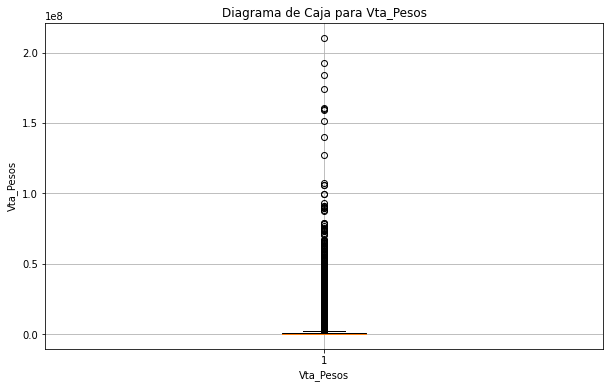

In [120]:
plt.figure(figsize=(10, 6))
plt.boxplot(data["Vta_Pesos"])
plt.title('Diagrama de Caja para Vta_Pesos')
plt.ylabel('Vta_Pesos')
plt.xlabel('Vta_Pesos')
plt.grid(True)
plt.show()

En las variables categóricas podemos ver las categorías que son infrecuentes en comparación con otras.

In [121]:
data['agno'].value_counts()

2018    35637
2017    35475
2020    34826
2019    33973
2021    30158
Name: agno, dtype: int64

Vemos que la columna agno esta distribuida equitativamente

In [122]:
data['mes'].value_counts()

10    14868
5     14792
6     14760
4     14747
7     14690
9     14690
3     14664
1     14658
8     14603
2     14566
11    11540
12    11491
Name: mes, dtype: int64

La columna mes igual esta distribuida equitativamente

In [123]:
data['descri_item'].value_counts()

ITEM PRIVADO                                                   15180
COLUN DULCE DE LECHE PT PL 400 COLUN                            6730
NESTLE EL MANJAR BOLSA 1000 NESTLE                              6683
COLUN BOLSA 1000 AGR.COOP.UNION                                 6660
NESTLE EL MANJAR BOLSA 500 NESTLE                               6581
                                                               ...  
SANTA ESTER DULCE DE LECHE PALO DE CANELA POT PL 350 LACTEO        1
LAPATAIA DULCE DE LECHE ARTESANAL FCO VID 440X2 880                1
NESTLE EL MANJAR BOLSA 500 NESTL                                   1
COLUN SIN LACTOSA POTE 380GR                                       1
COLUN DULCE DE LECHE POTE.1000 COLUN                               1
Name: descri_item, Length: 98, dtype: int64

In [124]:
def porcentaje_abarcado(data, columna, umbral):
    # Considerar solo las filas con valores de capacidad que se repiten más de <umbral> veces
    valores = data[columna].value_counts()[data[columna].value_counts() >= umbral]
    valores_abarcados = valores.sum()/data[columna].count()
    return valores_abarcados

umbrales = list(set(data["descri_item"].value_counts().values))
umbrales.sort()
umbrales.reverse()

for umbral in umbrales:
    print("Umbral:", umbral)
    print("Porcentaje de descri_item abarcado:", porcentaje_abarcado(data, "descri_item", umbral))

Umbral: 15180
Porcentaje de descri_item abarcado: 0.08925788944487238
Umbral: 6730
Porcentaje de descri_item abarcado: 0.12883006309203912
Umbral: 6683
Porcentaje de descri_item abarcado: 0.168125878319976
Umbral: 6660
Porcentaje de descri_item abarcado: 0.2072864543214813
Umbral: 6581
Porcentaje de descri_item abarcado: 0.24598251298002574
Umbral: 6505
Porcentaje de descri_item abarcado: 0.28423169419470923
Umbral: 6451
Porcentaje de descri_item abarcado: 0.3221633572255967
Umbral: 6204
Porcentaje de descri_item abarcado: 0.35864266856393584
Umbral: 5826
Porcentaje de descri_item abarcado: 0.392899352615703
Umbral: 5555
Porcentaje de descri_item abarcado: 0.4255625657821237
Umbral: 5476
Porcentaje de descri_item abarcado: 0.4577612616055836
Umbral: 5289
Porcentaje de descri_item abarcado: 0.4888604037184907
Umbral: 5270
Porcentaje de descri_item abarcado: 0.5198478264704326
Umbral: 4976
Porcentaje de descri_item abarcado: 0.5491065391105963
Umbral: 4856
Porcentaje de descri_item abarc

In [125]:
# Eliminar los outliers en descri_item: aquellos que se repiten menos de 230 veces
data = data[data["descri_item"].map(data["descri_item"].value_counts()) >= 230]
data.value_counts("descri_item")

descri_item
ITEM PRIVADO                                                    15180
COLUN DULCE DE LECHE PT PL 400 COLUN                             6730
NESTLE EL MANJAR BOLSA 1000 NESTLE                               6683
COLUN BOLSA 1000 AGR.COOP.UNION                                  6660
NESTLE EL MANJAR BOLSA 500 NESTLE                                6581
COLUN BOLSA 500 AGR.COOP.UNION                                   6505
SOPROLE MANJAR ACARAMELADO PT PL 400 SOPROLE                     6451
SOPROLE MANJAR ACARAMELADO BL PL 1000 SOPROLE                    6204
COLUN DULCE DE LECHE POTE 200 COLUN                              5826
COLUN MANJAR RECETA DE CAMPO BL ALUM 1000 COLUN                  5555
CALO BOLSA PL 1000 WATT S                                        5476
COLUN MANJAR RECETA DE CAMPO POT PL 400G COLUN                   5289
ENLINEA DULCE DE LECHE S/GLUTEN C/STEVIA POT 380 GR ECKART       5270
NESTLE RECETA CASERA MANJAR BL1000 NESTLE                        4976
COLUN DU

In [126]:
data['EMPRESA'].value_counts()

RETAILER A    66136
RETAILER C    51325
RETAILER B    51156
Name: EMPRESA, dtype: int64

La columna EMPRESA esta distribuida equitativamente

In [127]:
data['marca'].value_counts()

COLUN           42849
NESTLE          36844
SOPROLE         22607
PRIVADA         15180
CALO            11683
OT.MARCAS        7834
MANFREY          6963
ECKART           6807
EN LINEA         5691
LOS ALERCES      3073
LOS NIETITOS     2932
DAILY            2654
IANSA            2148
MICKELSEN        1017
VILAY             335
Name: marca, dtype: int64

In [128]:
def porcentaje_abarcado(data, columna, umbral):
    # Considerar solo las filas con valores de capacidad que se repiten más de <umbral> veces
    valores = data[columna].value_counts()[data[columna].value_counts() >= umbral]
    valores_abarcados = valores.sum()/data[columna].count()
    return valores_abarcados

umbrales = list(set(data["marca"].value_counts().values))
umbrales.sort()
umbrales.reverse()

for umbral in umbrales:
    print("Umbral:", umbral)
    print("Porcentaje de marca abarcado:", porcentaje_abarcado(data, "marca", umbral))

Umbral: 42849
Porcentaje de marca abarcado: 0.25412028443158163
Umbral: 36844
Porcentaje de marca abarcado: 0.47262731515802087
Umbral: 22607
Porcentaje de marca abarcado: 0.6067003920126678
Umbral: 15180
Porcentaje de marca abarcado: 0.6967269017951927
Umbral: 11683
Porcentaje de marca abarcado: 0.7660141029670793
Umbral: 7834
Porcentaje de marca abarcado: 0.8124744242869936
Umbral: 6963
Porcentaje de marca abarcado: 0.85376919290463
Umbral: 6807
Porcentaje de marca abarcado: 0.894138787903948
Umbral: 5691
Porcentaje de marca abarcado: 0.9278898331722187
Umbral: 3073
Porcentaje de marca abarcado: 0.9461145673330684
Umbral: 2932
Porcentaje de marca abarcado: 0.9635030868773611
Umbral: 2654
Porcentaje de marca abarcado: 0.9792428995890095
Umbral: 2148
Porcentaje de marca abarcado: 0.9919818286412402
Umbral: 1017
Porcentaje de marca abarcado: 0.9980132489606623
Umbral: 335
Porcentaje de marca abarcado: 1.0


In [129]:
# Eliminar los outliers en Marca: aquellos que se repiten menos de 1017 veces
data = data[data["marca"].map(data["marca"].value_counts()) >= 1017]
data.value_counts("marca")

marca
COLUN           42849
NESTLE          36844
SOPROLE         22607
PRIVADA         15180
CALO            11683
OT.MARCAS        7834
MANFREY          6963
ECKART           6807
EN LINEA         5691
LOS ALERCES      3073
LOS NIETITOS     2932
DAILY            2654
IANSA            2148
MICKELSEN        1017
dtype: int64

In [130]:
data['Gramaje'].value_counts()

1000    47339
400     44432
500     22818
200     15013
380     13011
800     10755
550      3576
250      2747
545      2262
350      2148
340      1996
900      1170
6000      410
460       356
5000      249
Name: Gramaje, dtype: int64

In [131]:
def porcentaje_abarcado(data, columna, umbral):
    # Considerar solo las filas con valores de capacidad que se repiten más de <umbral> veces
    valores = data[columna].value_counts()[data[columna].value_counts() >= umbral]
    valores_abarcados = valores.sum()/data[columna].count()
    return valores_abarcados

umbrales = list(set(data["Gramaje"].value_counts().values))
umbrales.sort()
umbrales.reverse()

for umbral in umbrales:
    print("Umbral:", umbral)
    print("Porcentaje de Gramaje abarcado:", porcentaje_abarcado(data, "Gramaje", umbral))

Umbral: 47339
Porcentaje de Gramaje abarcado: 0.28130756706005394
Umbral: 44432


Porcentaje de Gramaje abarcado: 0.5453405592992715
Umbral: 22818
Porcentaje de Gramaje abarcado: 0.6809343839507493
Umbral: 15013
Porcentaje de Gramaje abarcado: 0.7701477282181101
Umbral: 13011
Porcentaje de Gramaje abarcado: 0.8474643752748363
Umbral: 10755
Porcentaje de Gramaje abarcado: 0.9113749539463519
Umbral: 3576
Porcentaje de Gramaje abarcado: 0.9326249985143984
Umbral: 2747
Porcentaje de Gramaje abarcado: 0.948948788343376
Umbral: 2262
Porcentaje de Gramaje abarcado: 0.9623905111657812
Umbral: 2148
Porcentaje de Gramaje abarcado: 0.975154799681487
Umbral: 1996
Porcentaje de Gramaje abarcado: 0.9870158424549268
Umbral: 1170
Porcentaje de Gramaje abarcado: 0.9939684577078951
Umbral: 410
Porcentaje de Gramaje abarcado: 0.9964048442495336
Umbral: 356
Porcentaje de Gramaje abarcado: 0.9985203408564196
Umbral: 249
Porcentaje de Gramaje abarcado: 1.0


In [132]:
# Eliminar los outliers en Gramaje: aquellos que se repiten menos de 410 veces
data = data[data["Gramaje"].map(data["Gramaje"].value_counts()) >= 410]
data.value_counts("Gramaje")

Gramaje
1000    47339
400     44432
500     22818
200     15013
380     13011
800     10755
550      3576
250      2747
545      2262
350      2148
340      1996
900      1170
6000      410
dtype: int64

In [133]:
data['Empaque'].value_counts()

BOLSA            74337
POTE             63055
FRASCO VIDRIO    13621
DOY PACK         11725
TARRO             4709
CAJA               230
Name: Empaque, dtype: int64

La columna Empaque aunque no está distribuida equitativamente, tiene pocas opciones por lo cual la dejaremos tal como está, al igual que las demás columnas.

In [134]:
data['SEGMENTO'].value_counts()

MANJAR            123107
DULCE DE LECHE     44570
Name: SEGMENTO, dtype: int64

In [135]:
data['VARIEDAD'].value_counts()

REGULAR        119635
ARTESANAL       21436
LIGHT           12227
SIN LACTOSA      7075
SABOR            4048
VEGETAL          1996
FUNCIONAL        1260
Name: VARIEDAD, dtype: int64

In [136]:
data['CADENA'].value_counts()

CADENA B     50795
CADENA A2    34755
CADENA C1    33158
CADENA A1    31175
CADENA C2    17794
Name: CADENA, dtype: int64

In [137]:
data['ZONAS'].value_counts()

RM3 SANTIAGO NOR-PONIENTE    27098
RM4 SANTIAGO SUR + OTROS     20705
RM2 SANTIAGO ORIENTE         16815
RM5 SANTIAGO SUR ORIENTE     13037
Z5 VIÑA DEL MAR               8646
Z4 LA SERENA                  8194
Z11 ZONA SUR                  8031
Z10 CONCEPCION                7914
Z6 OTROS V REGION             7875
Z7 RANCAGUA                   7811
Z8 TALCA                      7345
Z9 CHILLAN                    7171
Z1 NORTE GRANDE               7125
RM1 SANTIAGO CENTRO           7056
Z2 ANTOFAGASTA                6576
Z3 COPIAPO                    6278
Name: ZONAS, dtype: int64

### Paso 4: Convertir variables categóricas a Dummies (Antes extraer fecha si es necesario)

In [138]:
data = pd.get_dummies(data, columns=["agno", "mes", "descri_item","EMPRESA","marca","Gramaje","Empaque","SEGMENTO","VARIEDAD","CADENA","ZONAS"])
data.shape

(167677, 141)

### Paso 5: Normalizar variables numéricas

In [139]:
# Seleccionar las columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Normalización de los datos numéricos
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

## Selección de variables

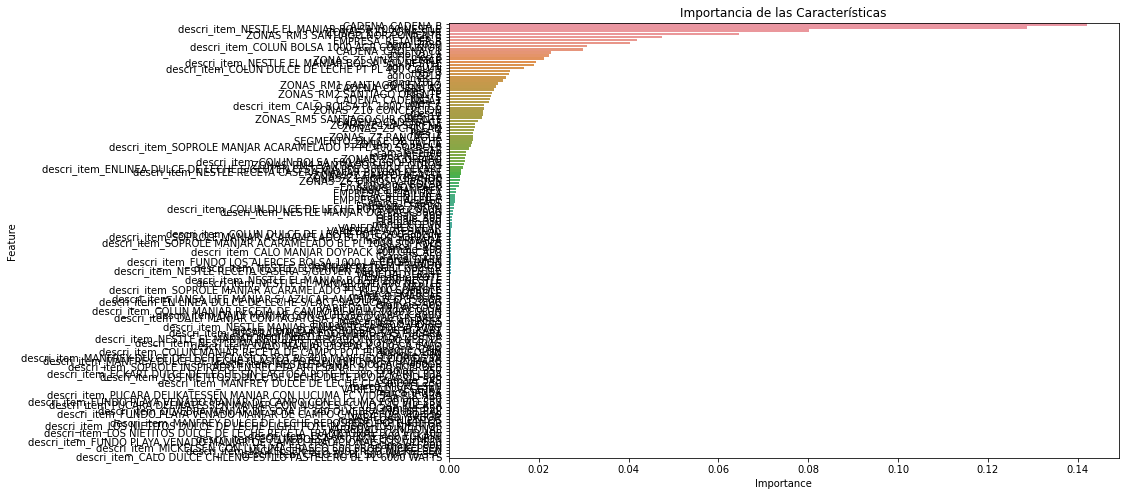

In [140]:
import seaborn as sns

all_columns = data.columns.tolist()
selected_features = [col for col in all_columns if col != 'Vta_Pesos']

# Crear y entrenar el modelo de regresión con árboles de decisión
X = data.drop('Vta_Pesos', axis=1)
y = data['Vta_Pesos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()

Como tenemos tantas columnas los gráficos no se ven bien por lo cual deberemos reducir la cantidad luego.

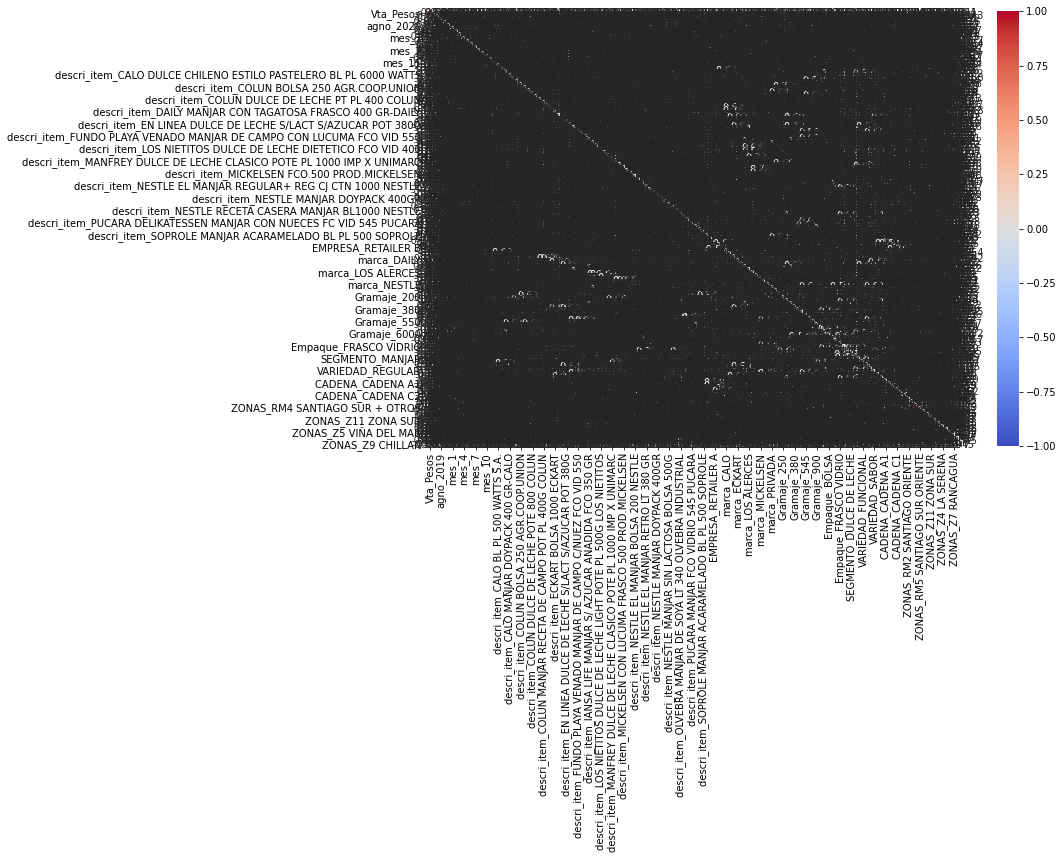

In [141]:
correlation_matrix = data[all_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Por el momento dejaremos todas las variables para luego comparar con las variables más importantes o que tienen mayor correlación de las gráficas anteriores.

In [142]:
# Seleccionar las características y la variable objetivo
X = data.drop(columns=['Vta_Pesos'])
y = data['Vta_Pesos']

## Desarrollo y evaluación del modelo

In [143]:
# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = linear_model.predict(X_test)

# Calcular métricas
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)

print(f'Linear Regression R2: {linear_r2}')
print(f'Linear Regression MAE: {linear_mae}')

Linear Regression R2: 0.19113488894553743
Linear Regression MAE: 0.004649803966117479


In [144]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus

def display_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())


# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

tree = DecisionTreeRegressor(random_state=21, max_depth=20)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


tree_r2 = r2_score(y_test, y_pred)
tree_mae = mean_absolute_error(y_test, y_pred)

print(f'Decision Tree R2: {tree_r2}')
print(f'Decision Tree MAE: {tree_mae}')

Decision Tree R2: 0.19819832581153807
Decision Tree MAE: 0.0031683499130311737


In [145]:
from sklearn.ensemble import RandomForestRegressor


# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior


# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)

# Calcular métricas
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

print(f'Random Forest R2: {rf_r2}')
print(f'Random Forest MAE: {rf_mae}')

Random Forest R2: 0.2459146154945765
Random Forest MAE: 0.0030881203148623816


## Reflexión

El modelo Random Forest es el que tiene mejor resultado de los 3 modelos probados.

1. R² (Coeficiente de Determinación): 0.2459

Interpretación: El valor de R² indica qué proporción de la varianza en la variable dependiente es explicada por las variables independientes del modelo. Un valor de 0.2459 significa que aproximadamente el 24.59% de la variabilidad en los datos se puede explicar con el modelo de Random Forest.

Conclusión: Este no es un valor muy alto, lo que sugiere que el modelo no está capturando bien las relaciones en los datos. Es posible que haya una complejidad o una variabilidad en los datos que el modelo no está logrando captar.

2. MAE (Error Absoluto Medio): 0.0031

Interpretación: El MAE es la media de las diferencias absolutas entre los valores predichos y los valores reales. Un MAE de 0.0031 sugiere que, en promedio, las predicciones del modelo se desvían de los valores reales en 0.0031 unidades.

Conclusión: Este valor parece ser bastante bajo, lo cual es positivo y sugiere que el modelo tiene una precisión razonable en términos absolutos. Sin embargo, la interpretación de lo "bajo" o "alto" depende de la escala de los datos.

Posibles Conclusiones:

Modelo Adecuado para la Tarea: Aunque el MAE es bajo, el R² sugiere que el modelo no está capturando bien las relaciones en los datos. Esto puede indicar que, aunque las predicciones individuales son bastante precisas en términos absolutos, el modelo no explica bien la variabilidad general de los datos.

Revisar Características: Podría ser beneficioso revisar las características que se están utilizando para entrenar el modelo. Es posible que algunas características importantes no estén incluidas o que haya características irrelevantes que estén añadiendo ruido.

Considerar Otros Modelos: Tal vez valga la pena probar otros modelos o enfoques, como Boosting, SVM o Redes Neuronales, que podrían capturar mejor la estructura de los datos.

Ajuste de Hiperparámetros: Realizar una búsqueda más exhaustiva de hiperparámetros para el Random Forest podría mejorar el desempeño del modelo. Métodos como Grid Search o Random Search pueden ayudar en este ajuste.

Evaluación Adicional: Podría ser útil evaluar el modelo con otras métricas (como RMSE, MAPE, etc.) y realizar una validación cruzada para asegurarte de que los resultados sean consistentes.

Análisis de Residuos: Realizar un análisis de residuos puede revelar patrones no capturados por el modelo, lo que podría dar pistas sobre cómo mejorarlo.



